**Topic:        Challenge Set 3**   
Subject:      Explore and visualize our scraped movie data in pandas  
Date:         10/07/2018  
Name:         Arianna Breslauer

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [79]:
movies_df = pd.read_csv('nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [80]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


**Challenge 1**  
Plot domestic total gross over time.

In [81]:
movies_df.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [82]:
from datetime import datetime as dt
movies_df['ReleaseDate'] = pd.to_datetime(movies_df['ReleaseDate'])
movies_df = movies_df.sort_values('ReleaseDate')

In [83]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,nan,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.00,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.00,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.00,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.00,55703475,Tommy Wirkola,R,88,2013-01-25


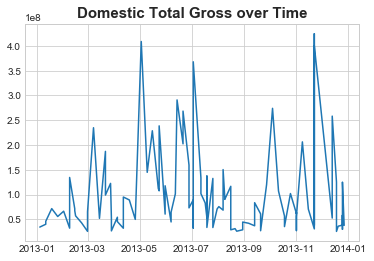

In [84]:
plt.plot(movies_df['ReleaseDate'], movies_df['DomesticTotalGross'])
plt.title('Domestic Total Gross over Time', size = 15, fontweight = 'bold');

**Challenge 2**  
Plot runtime vs. domestic total gross.

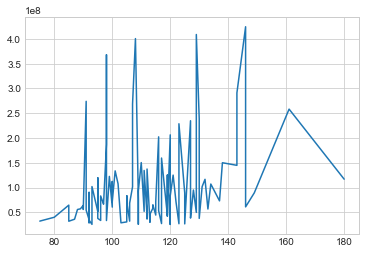

In [113]:
movies_df=movies_df.sort_values('Runtime')
plt.plot(movies_df['Runtime'], movies_df['DomesticTotalGross']);

**Challenge 3**  
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [86]:
movies_df_ratings = movies_df.groupby('Rating')[['Runtime','DomesticTotalGross']].mean()

In [87]:
movies_df_ratings.head()

,Runtime,DomesticTotalGross
Rating,,
G,107.00,268492764.00
PG,99.93,131135716.07
PG-13,117.51,111449769.02
R,110.73,69892429.00


**Challenge 4**  
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [88]:
g_rating = movies_df[movies_df['Rating']=='G'].sort_values('ReleaseDate')
pg_rating = movies_df[movies_df['Rating']=='PG'].sort_values('ReleaseDate')
pg13_rating = movies_df[movies_df['Rating']=='PG-13'].sort_values('ReleaseDate')
r_rating = movies_df[movies_df['Rating']=='R'].sort_values('ReleaseDate')

In [89]:
g_rating.head()
# We can see that there will be no plot for g_rating as only one g-rated movie, Monsters University

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,nan,268492764,Dan Scanlon,G,107,2013-06-21


In [90]:
pg13_rating.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
46,Mama,15000000.00,71628180,Andres Muschietti,PG-13,100,2013-01-18
52,Warm Bodies,35000000.00,66380662,Jonathan Levine,PG-13,97,2013-02-01
47,Safe Haven,28000000.00,71349120,Lasse Hallstrom,PG-13,115,2013-02-14
74,Snitch,nan,42930462,Ric Roman Waugh,PG-13,112,2013-02-22
53,Jack the Giant Slayer,195000000.00,65187603,Bryan Singer,PG-13,114,2013-03-01


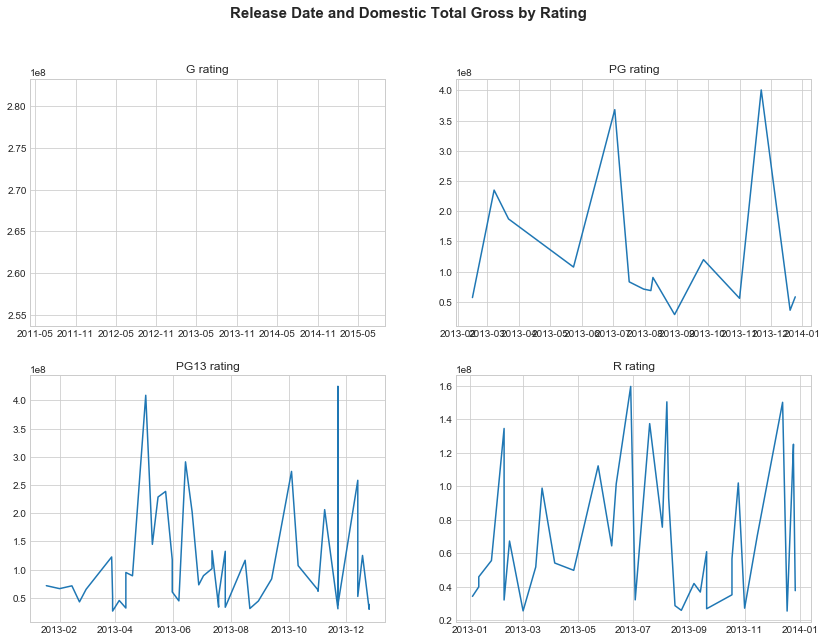

In [111]:
plt.figure(figsize=[14,10])

plt.suptitle('Release Date and Domestic Total Gross by Rating',fontsize = 15, fontweight = 'bold')

plt.subplot(2,2,1)
plt.plot(g_rating['ReleaseDate'], g_rating['DomesticTotalGross'])
plt.title('G rating')

plt.subplot(2,2,2)
plt.plot(pg_rating['ReleaseDate'], pg_rating['DomesticTotalGross'])
plt.title('PG rating')

plt.subplot(2,2,3)
plt.plot(pg13_rating['ReleaseDate'], pg13_rating['DomesticTotalGross'])
plt.title('PG13 rating')

plt.subplot(2,2,4)
plt.plot(r_rating['ReleaseDate'], r_rating['DomesticTotalGross'])
plt.title('R rating');

**Challenge 5**  
What director in your dataset has the highest gross per movie?

In [92]:
director = movies_df.groupby(['Director'])['DomesticTotalGross'].max().sort_values(ascending = False).head(1)

In [93]:
director

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

In [94]:
# Adam McKay had the highest gross per movie at $125,168,368

**Challenge 6**  

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.  

Title of graph should include: Mean Domestic Total Gross by Month in 2013.  

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [95]:
movies_df = movies_df.sort_values('ReleaseDate')

In [96]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,nan,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.00,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.00,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.00,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.00,55703475,Tommy Wirkola,R,88,2013-01-25


In [97]:
movies_df['Month'] = [str(entry).split('-')[1] for entry in movies_df['ReleaseDate']]

In [98]:
# Could also do it like this
# def to_month(date):
#      return date.month
# df['ReleaseMonth'] = df['ReleaseDate'].apply(to_month)

In [99]:
movies_df.tail()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
91,Grudge Match,40000000.00,29807260,Peter Segal,PG-13,113,2013-12-25,12
77,47 Ronin,175000000.00,38362475,Carl Rinsch,PG-13,127,2013-12-25,12
23,Lone Survivor,40000000.00,125095601,Peter Berg,R,121,2013-12-25,12
27,The Wolf of Wall Street,100000000.00,116900694,Martin Scorsese,R,180,2013-12-25,12
78,August: Osage County,nan,37738810,John Wells,R,130,2013-12-27,12


In [101]:
movies_df = movies_df.sort_values('Month')

In [106]:
# Standard error
standard_error = movies_df.groupby('Month')[['DomesticTotalGross']].std().reset_index().rename(columns={'DomesticTotalGross':'StdDev'})
standard_error.head()

,Month,StdDev
0,01,14659469.44
1,02,32831848.63
2,03,73239416.71
3,04,25301038.69
4,05,111775447.29


In [107]:
mean_gross = movies_df.groupby('Month')[['DomesticTotalGross']].mean().reset_index().rename(columns={'DomesticTotalGross':'Mean'})
mean_gross.head()

,Month,Mean
0,01,49543237.20
1,02,67386013.71
2,03,96097096.22
3,04,60940719.50
4,05,177409720.50


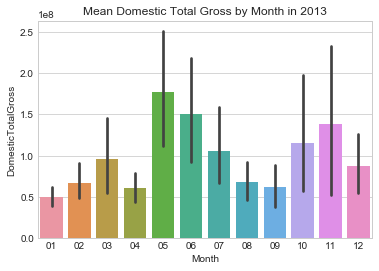

In [109]:
# Seaborn to display error bars
month = movies_df['Month'].values
sns.barplot(movies_df.Month, movies_df.DomesticTotalGross).set_title('Mean Domestic Total Gross by Month in 2013');